# 1WK False Mem

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scikit_posthocs as sp


In [16]:
filtered_columns_df = pd.read_csv('joint_analysis.csv')
filtered_columns_df

,Unnamed: 0,Exp_condition,PostQues_3,PostQues_10,PostQues_14,PostQues_20,PostQues_25,Q3,Q10,Q14,Q20,Q25,main_false_memories,follow_false_memories
0,0,survey-based,4,5,4,4,2,4,6,4,3,2,1,1
1,1,static-chatbot,4,3,2,4,2,5,4,2,4,2,0,1
2,2,none,1,2,2,4,1,1,5,3,3,1,0,1
3,3,chatbot,4,3,2,2,2,6,4,2,3,1,0,1
4,4,none,2,6,2,4,2,2,4,2,6,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,static-chatbot,5,7,2,6,4,5,7,2,4,4,3,2
190,191,static-chatbot,1,5,3,6,4,7,3,3,4,4,2,1
191,192,none,2,2,2,4,4,2,4,4,4,4,0,0
192,193,survey-based,4,2,1,7,1,2,2,5,1,1,1,1


In [3]:
# Assuming 'filtered_columns_df' is your DataFrame and it includes the 'Exp_condition' column
exp_condition_counts = filtered_columns_df['Exp_condition'].value_counts()

# Print the counts of each experimental condition
print(exp_condition_counts)

Exp_condition
none              49
chatbot           49
survey-based      48
static-chatbot    48
Name: count, dtype: int64


In [4]:
# Initialize a dictionary to store lists of false_memories for each unique Exp_condition
condition_dict = {}

# Loop through each row in the DataFrame
for index, row in filtered_columns_df.iterrows():
    condition = row['Exp_condition']
    memory = row['follow_false_memories']  # Assuming 'false_memories' holds the values to store

    # If the condition is not yet a key in the dictionary, add it with an empty list
    if condition not in condition_dict:
        condition_dict[condition] = []

    # Append the false memory to the appropriate list
    condition_dict[condition].append(memory)


In [5]:
print(condition_dict)

{'survey-based': [1, 3, 4, 0, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 4, 1, 3, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1, 1, 3, 1, 2, 1, 1, 2, 2, 3, 0, 2, 2, 1, 1], 'static-chatbot': [1, 0, 2, 1, 1, 2, 2, 1, 0, 4, 1, 1, 1, 2, 1, 1, 3, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 3, 4, 2, 1, 2, 1, 0, 0, 0, 5, 1, 2, 3, 4, 1, 1, 2, 1, 0, 2, 1], 'none': [1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0, 3, 2, 4, 0, 1, 1, 1, 0, 4, 0, 0, 0, 3, 3, 1, 0, 2, 1, 0, 0, 3, 0], 'chatbot': [1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 5, 3, 3, 1, 4, 1, 1, 2, 3, 0, 3, 2, 2, 2, 0, 4, 2, 0, 3, 0, 2, 2, 3, 2, 0, 1, 2, 2, 2, 1, 4, 2, 2, 3, 0, 1, 0, 2, 3]}


In [6]:
# Define the specific order of conditions
ordered_conditions = ['none', 'survey-based', 'static-chatbot', 'chatbot']

# Prepare data for plotting according to the specified order
memory_lists_ordered = [condition_dict[condition] for condition in ordered_conditions if condition in condition_dict]

In [7]:
colors = ['#D3D3D3', '#87CEEB', '#FFE066', '#FF9999']
ordered_labels = ['none', 'survey based', 'prescripted chatbot', 'generative chatbot']

In [8]:
# Prepare data for plotting according to the specified order and calculate mean and standard error
means = []
errors = []
sds = []
for condition in ordered_conditions:
    if condition in condition_dict:
        values = condition_dict[condition]
        mean = np.mean(values)
        # Calculate the standard error as the error bar (standard deviation divided by the square root of the sample size)
        std = np.std(values)
        error = np.std(values) / np.sqrt(len(values))
        means.append(mean)
        sds.append(std)
        errors.append(error)

0 and 3 with id: 0


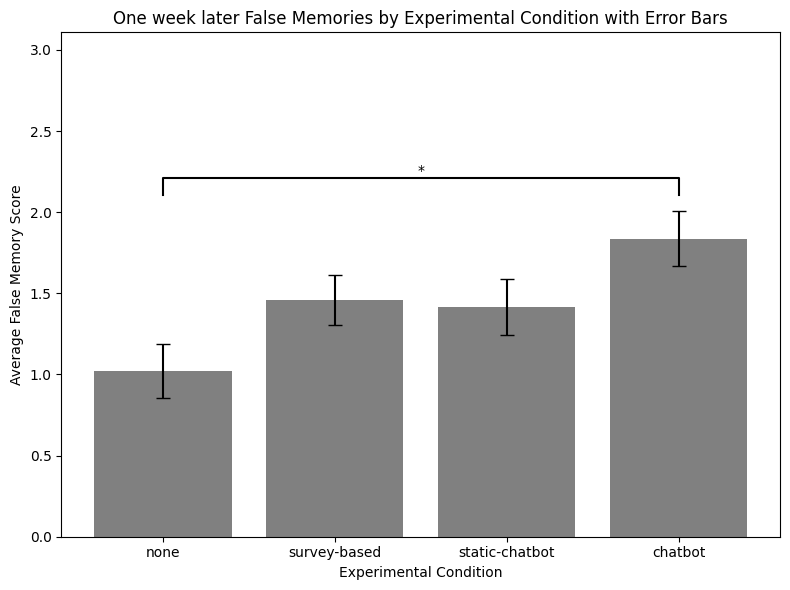

In [9]:
# X positions
x_pos = np.arange(len(ordered_conditions))

# Significance values (p-values) for the significance markers
significance_values = [
    ((0, 3), '*'),# Between 'none' and 'chatbot'    
]

# Creating the bar plot with error bars
plt.figure(figsize=(8, 6))
bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color='grey')
plt.title('One week later False Memories by Experimental Condition with Error Bars')
plt.ylabel('Average False Memory Score')
plt.xlabel('Experimental Condition')
plt.xticks(x_pos, ordered_conditions)

# Adding significance markers with p-values, separate and not overlapping
y_base_offset = 0.5  # Base vertical offset for significance lines
y_increment = 0.5  # Increment for each subsequent significance marker

# Initialize the first y position above the highest bar
current_y_position = max(means) + max(errors) + 0.1

for idx, ((i, j), label) in enumerate(significance_values):
    x1, x2 = x_pos[i], x_pos[j]
    print("{1} and {2} with id: {0}".format(idx, x1, x2))
    y = current_y_position
    h, col = 0.1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
    current_y_position += y_increment  # Update the y position for the next marker

# Adjust plot limits to make space for significance markers
plt.ylim(0, current_y_position + y_increment)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


0 and 3 with id: 0


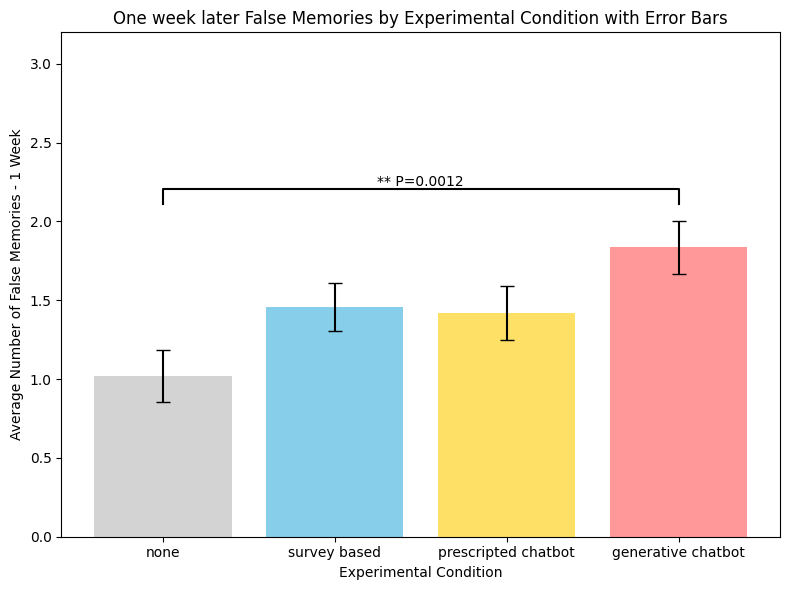

In [10]:
# X positions
x_pos = np.arange(len(ordered_conditions))

# Significance values (p-values) for the significance markers
significance_values = [
    ((0, 3), '** P=0.0012'),# Between 'none' and 'chatbot'    
]

# Creating the bar plot with error bars
plt.figure(figsize=(8, 6))
bars = plt.bar(x_pos, means, yerr=errors, capsize=5, color=colors)
plt.title('One week later False Memories by Experimental Condition with Error Bars')
plt.ylabel('Average Number of False Memories - 1 Week')
plt.xlabel('Experimental Condition')
plt.xticks(x_pos, ordered_labels)

# Adding significance markers with p-values, separate and not overlapping
y_base_offset = 0.5  # Base vertical offset for significance lines
y_increment = 0.2  # Increment for each subsequent significance marker

# Initialize the first y position above the highest bar
current_y_position = max(means) + max(errors) + 0.1

for idx, ((i, j), label) in enumerate(significance_values):
    x1, x2 = x_pos[i], x_pos[j]
    print("{1} and {2} with id: {0}".format(idx, x1, x2))
    y = current_y_position
    h, col = 0.1, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1 + x2) * 0.5, y + h, label, ha='center', va='bottom', color=col)
    current_y_position += y_increment  # Update the y position for the next marker

# Adjust plot limits to make space for significance markers
#plt.ylim(0, current_y_position + y_increment)
plt.ylim(0, 3.2)

# Improve layout
plt.tight_layout()

plt.savefig('1WK_false_mem.png')

# Show the plot
plt.show()

## Mean, SD, Error for Follow Up False Memories

In [11]:
print(ordered_conditions)
print (means) 
print(sds)
print(errors)

['none', 'survey-based', 'static-chatbot', 'chatbot']
[1.0204081632653061, 1.4583333333333333, 1.4166666666666667, 1.836734693877551]
[1.151570284054358, 1.059841445164742, 1.1873172373979173, 1.1840252819885948]
[0.164510040579194, 0.15297493591604647, 0.1713744816562926, 0.16914646885551354]


## Normality Test

In [12]:
from scipy.stats import shapiro

# Initialize a dictionary to store the test results
shapiro_results = {}

# Perform the Shapiro-Wilk test for each condition and store the results
for condition in ordered_conditions:
    if condition in condition_dict:
        values = np.array(condition_dict[condition])  # Convert list to NumPy array for processing
        test_statistic, p_value = shapiro(values)
        shapiro_results[condition] = (test_statistic, p_value)

# Display the results
for condition, results in shapiro_results.items():
    print(f"Condition: {condition}\nShapiro-Wilk Test Statistic: {results[0]}, P-Value: {results[1]}, {results[1]>0.05}\n ")


Condition: none
Shapiro-Wilk Test Statistic: 0.8078309297561646, P-Value: 1.6174631127796602e-06, False
 
Condition: survey-based
Shapiro-Wilk Test Statistic: 0.8968718647956848, P-Value: 0.0004990921006537974, False
 
Condition: static-chatbot
Shapiro-Wilk Test Statistic: 0.8592275381088257, P-Value: 3.857967021758668e-05, False
 
Condition: chatbot
Shapiro-Wilk Test Statistic: 0.9146895408630371, P-Value: 0.0017194583779200912, False
 


# Kruskal Wallis Test

In [13]:
from scipy.stats import kruskal

# Prepare data for the test, ensuring only non-empty lists are included
data = [condition_dict[condition] for condition in ordered_conditions if condition in condition_dict and len(condition_dict[condition]) > 0]

# Check if we have enough groups with data to perform Kruskal-Wallis
if len(data) >= 2:  # We need at least two groups to compare
    # Perform the Kruskal-Wallis H Test
    test_statistic, p_value = kruskal(*data)
    print(f"Kruskal-Wallis H Test Statistic: {test_statistic}, P-Value: {p_value}")
else:
    print("Not enough data to perform Kruskal-Wallis test.")


Kruskal-Wallis H Test Statistic: 14.0203000839357, P-Value: 0.002877650699757943


In [14]:
print(data)

[[1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0, 3, 2, 4, 0, 1, 1, 1, 0, 4, 0, 0, 0, 3, 3, 1, 0, 2, 1, 0, 0, 3, 0], [1, 3, 4, 0, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 4, 1, 3, 0, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 3, 1, 1, 3, 1, 2, 1, 1, 2, 2, 3, 0, 2, 2, 1, 1], [1, 0, 2, 1, 1, 2, 2, 1, 0, 4, 1, 1, 1, 2, 1, 1, 3, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 3, 4, 2, 1, 2, 1, 0, 0, 0, 5, 1, 2, 3, 4, 1, 1, 2, 1, 0, 2, 1], [1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 5, 3, 3, 1, 4, 1, 1, 2, 3, 0, 3, 2, 2, 2, 0, 4, 2, 0, 3, 0, 2, 2, 3, 2, 0, 1, 2, 2, 2, 1, 4, 2, 2, 3, 0, 1, 0, 2, 3]]


## Posthoc Dunn Test with Benjamini–Hochberg FDR

In [15]:
#Dunn Test with Benjamini–Hochberg FDR correction

dunn_results_fdr = sp.posthoc_dunn(data, group_col='condition', p_adjust='fdr_bh')

# Print the adjusted p-values for pairwise comparisons
print("Adjusted p-values for pairwise comparisons with FDR:")
print(dunn_results_fdr)
print(dunn_results_fdr <0.05)

#None - 1, survey - 2, prescript - 3, generative - 4

Adjusted p-values for pairwise comparisons with FDR:
          1         2         3         4
1  1.000000  0.092821  0.122810  0.001202
2  0.092821  1.000000  0.677568  0.147831
3  0.122810  0.677568  1.000000  0.100124
4  0.001202  0.147831  0.100124  1.000000
       1      2      3      4
1  False  False  False   True
2  False  False  False  False
3  False  False  False  False
4   True  False  False  False


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e32e89f2-6d44-49b2-bfdc-83c1c87a0fb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>